In [2]:
import numpy as np
import json
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score , precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
import keras.metrics
import librosa

2023-12-30 20:28:19.179366: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 20:28:19.203585: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 20:28:19.203649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 20:28:19.204446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 20:28:19.208301: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-30 20:28:19.208773: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
DATASET_PATH = "data.json"
DATASET_PATH1 = "data1.json"

In [4]:
def load_path(dataset_path):
    with open(dataset_path,"r") as fp :
        data = json.load(fp)
        
    #convert LISTS INTO NUMPY ARRAYS
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs ,targets

In [5]:
def plot_history(history):
    
    fig , axs = plt.subplots(2)
    
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"],label="test accuracy")
    axs[0].set_ylabel("accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("accuracy eval")
    
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"],label="test error")
    axs[1].set_ylabel("Error")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 338)               0         
                                                                 
 dense (Dense)               (None, 512)               173568    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 321994 (1.23 MB)
Trainable params: 321994 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100


2023-12-30 20:28:40.592637: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-12-30 20:28:40.592685: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: joker-IdeaPad-Gaming-3-15ACH6
2023-12-30 20:28:40.592695: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: joker-IdeaPad-Gaming-3-15ACH6
2023-12-30 20:28:40.592867: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.129.3
2023-12-30 20:28:40.592899: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  535.129.03  Release Build  (dvs-builder@U16-I3-B15-1-1)  Thu Oct 19 18:54:01 UTC 2023
GCC version:  gcc version 9.4.0 (Ubunt

118/118 [==============================] - 1s 5ms/step - loss: 6.1549 - accuracy: 0.6795 - val_loss: 1.6405 - val_accuracy: 0.7070
Epoch 2/100
118/118 [==============================] - 0s 4ms/step - loss: 1.6489 - accuracy: 0.7381 - val_loss: 3.3324 - val_accuracy: 0.4755
Epoch 3/100
118/118 [==============================] - 0s 4ms/step - loss: 1.1745 - accuracy: 0.7551 - val_loss: 0.8741 - val_accuracy: 0.7498
Epoch 4/100
118/118 [==============================] - 1s 4ms/step - loss: 1.0750 - accuracy: 0.7607 - val_loss: 0.8654 - val_accuracy: 0.7877
Epoch 5/100
118/118 [==============================] - 1s 5ms/step - loss: 0.8083 - accuracy: 0.7908 - val_loss: 0.9261 - val_accuracy: 0.7728
Epoch 6/100
118/118 [==============================] - 0s 4ms/step - loss: 0.9209 - accuracy: 0.7868 - val_loss: 0.7135 - val_accuracy: 0.7921
Epoch 7/100
118/118 [==============================] - 0s 4ms/step - loss: 0.7234 - accuracy: 0.7990 - val_loss: 0.7053 - val_accuracy: 0.8125
Epoch 8/100

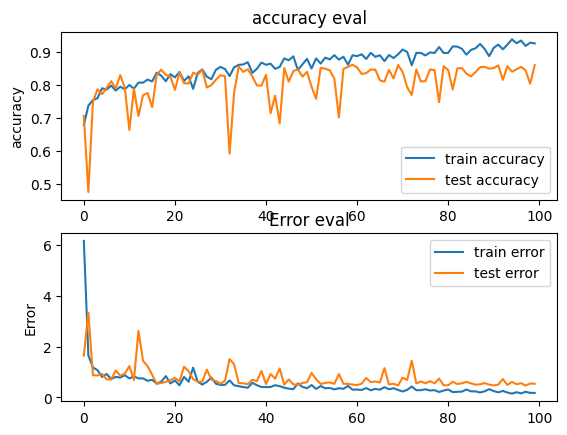

In [6]:
if __name__ == "__main__" :
    #load data
    inputs ,targets = load_path(DATASET_PATH)
    
    check , check_t = load_path(DATASET_PATH1)
    
    #split the data into train and test sets
    inputs_train ,input_test ,target_train ,target_test = train_test_split(inputs,targets,test_size=0.3)
    
    #build the network
    model = keras.Sequential([
        #input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
        
        #1st hidden layer
        keras.layers.Dense(512, activation="relu"),
        
        #2nd
        keras.layers.Dense(256 , activation = "relu"),
        
        #3rd
        keras.layers.Dense(64, activation="relu"),
        
        keras.layers.Dense(10, activation = "softmax")
    ])
    
    #compile  network
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer= optimiser ,
                    loss="sparse_categorical_crossentropy" ,
                    metrics = ['accuracy'])
    
    model.summary()
    
    #train network
    history = model.fit(inputs_train, target_train , validation_data=(input_test,target_test),
              epochs=100 , batch_size = 32)

    plot_history(history)
    plt.show()
    


 Model evaluation
51/51 [==============================] - 0s 822us/step - loss: 0.5387 - accuracy: 0.8610
[1 1 1 ... 1 0 0]
51/51 [==============================] - 0s 935us/step
[1 1 0 ... 1 0 0]
accuracy : 0.8609559279950342
precision :  0.9087301587301587
recall : 0.720125786163522
f1 :  0.8035087719298245


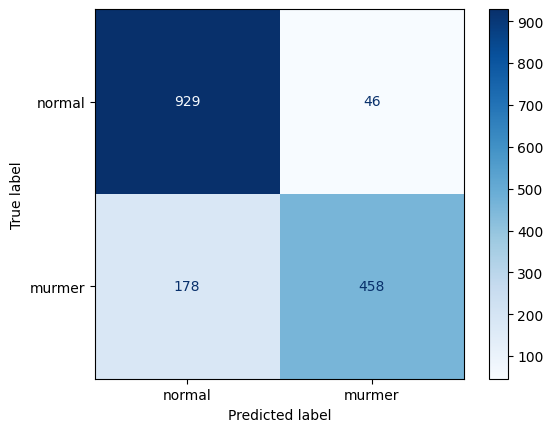

In [7]:
    print("\n Model evaluation")
    model.evaluate(input_test, target_test,verbose=1)
    

    print(target_test)
    
    
    y_pred = []
    
    predictions = model.predict(input_test)
    
    for p in zip(predictions):
        z = np.argmax(p[0])    
        y_pred.append(z)
        
    y_pred = np.array(y_pred)
    
    print(y_pred)
    
    cm = confusion_matrix(target_test, y_pred)
    
    labels = ["normal","murmer"]
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=labels )

    disp.plot(cmap=plt.cm.Blues)
    
    accuracy = accuracy_score(target_test, y_pred)
    precision  = precision_score(target_test, y_pred)
    recall = recall_score(target_test, y_pred)
    f1 = f1_score(target_test, y_pred)
    
    print( "accuracy :" , accuracy) 
    print("precision : ", precision)
    print("recall :" , recall) 
    print("f1 : " , f1)  
    
    plt.show()
    
    
    